In [2]:
import pandas as pd
import numpy as np

import pyodbc as odbc
# import sqlalchemy

## SQL Alchemy

In [2]:
# sqlalchemy.__version__

## Data Warehouse Query

In [11]:
server = 'conapp02'
database = 'CSBInventoryDW'
username = 'CONESTOGAMEATS\msmetanin'
password = open('mydata.txt', 'r').read()
cnxn = odbc.connect('DRIVER={SQL Server}; SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password, trusted_connection='yes')
cursor = cnxn.cursor()
print(cursor)

## Import of Autofom and Genetic Data

In [4]:
cursor.execute("SELECT table_name FROM information_schema.tables")
for table_name in cursor:
   print(table_name)

('PiecesByDay', )
('CarlisleUpperLowerTreshhold', )
('Giveaway', )
('HogGradingDataGrouped', )
('ProductionByHour', )
('HotDressScaleData', )
('CutSheetSnapshot', )
('HogGradingData', )
('CutSheetChanges', )
('AutoFomData', )
('Genetics', )


# Carlisle Treshold

In [28]:
query = '''
            Select *
            From CarlisleUpperLowerTreshhold
            '''
df_Carl_Tresh = pd.read_sql(query, cnxn)
df_Carl_Tresh

C:\Users\msmetanin\AppData\Local\Temp\ipykernel_18020\2735652481.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Carl_Tresh = pd.read_sql(query, cnxn)


,ProductID,CarlisleProduct,ProductNo,ItemDesc,Lowest,Upper,StandardWeight,AverageWeight,Tare,AdditionalTare,isActive
0,444,010001,10001,Fresh Pork Loin Select,23.0,36.0,0.0,0.0,1.02,1.02,True
1,445,010002,10002,Pork Backs Long Cut,15.0,40.0,0.0,0.0,0.94,0.94,False
2,446,010003,10003,Fresh Pork Shoulder New York Select,26.0,44.1,0.0,31.6,0.94,0.94,True
3,447,010004,10004,Pork Shldr New Yorks Bnls Skls,19.5,42.0,0.0,25.4,0.96,0.96,False
4,448,010005,10005,Fresh Pork Shoulder Butt Select,24.0,45.0,0.0,30.9,0.94,0.94,True
...,...,...,...,...,...,...,...,...,...,...,...
1776,2233,,33035,Fresh Pork Ham Trim,1.0,10000.0,0.0,NaN,0.00,NaN,True
1777,2234,030124,30124,Fresh Pork Belly Rindless,850.0,950.0,0.0,NaN,0.00,NaN,True
1778,2235,031124,31124,Fresh Pork Belly Rindless,850.0,950.0,0.0,NaN,0.00,NaN,True
1779,2236,031034,31034,Fresh Pork Belly Rindless,850.0,950.0,0.0,NaN,0.00,NaN,True


In [29]:
df_Carl_Tresh.loc[df_Carl_Tresh['Tare'] != df_Carl_Tresh['AdditionalTare']]

,ProductID,CarlisleProduct,ProductNo,ItemDesc,Lowest,Upper,StandardWeight,AverageWeight,Tare,AdditionalTare,isActive
516,961,030001,30001,Fresh Pork Loin Select,1.0,10000.0,NaN,NaN,0.0,NaN,True
517,962,030003,30003,Fresh Pork Shoulder New York Select,1.0,10000.0,0.0,NaN,0.0,NaN,True
518,963,030004,30004,Pork Shlr New York,1.0,10000.0,0.0,NaN,0.0,NaN,False
519,964,030005,30005,Fresh Pork Shoulder Butt Select,1.0,10000.0,0.0,NaN,0.0,NaN,True
520,965,030006,30006,Fresh Pork Shoulder Butt Boneless,1.0,10000.0,0.0,NaN,0.0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
1776,2233,,33035,Fresh Pork Ham Trim,1.0,10000.0,0.0,NaN,0.0,NaN,True
1777,2234,030124,30124,Fresh Pork Belly Rindless,850.0,950.0,0.0,NaN,0.0,NaN,True
1778,2235,031124,31124,Fresh Pork Belly Rindless,850.0,950.0,0.0,NaN,0.0,NaN,True
1779,2236,031034,31034,Fresh Pork Belly Rindless,850.0,950.0,0.0,NaN,0.0,NaN,True


In [24]:
df_Carl_Tresh.dtypes

ProductID            int64
CarlisleProduct     object
ProductNo           object
ItemDesc            object
Lowest             float64
Upper              float64
StandardWeight     float64
AverageWeight      float64
Tare               float64
AdditionalTare     float64
dtype: object

In [26]:
df_Carl_Tresh.loc[df_Carl_Tresh['ProductNo'] == '30006']

,ProductID,CarlisleProduct,ProductNo,ItemDesc,Lowest,Upper,StandardWeight,AverageWeight,Tare,AdditionalTare
520,965,030006,30006,Fresh Pork Shoulder Butt Boneless,1.0,10000.0,0.0,NaN,0.0,NaN
1079,1525,0030006,30006,Pork Shldr Butts Bnls,1.0,10000.0,0.0,NaN,0.0,NaN


## Autofom Data

In [12]:
query = '''SELECT *
            FROM AutoFomData
            WHERE KillDate between ? and ?
            '''

df_atfm = pd.read_sql(query, cnxn, params = ['20230301', '20230315'])
df_atfm.head()

C:\Users\msmetanin\AppData\Local\Temp\ipykernel_15804\2386754686.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_atfm = pd.read_sql(query, cnxn, params = ['20230301', '20230315'])


,KillDate,VendorKey,Tattoo1,PPPNumber,AFPercentLean,AFFatDepth,AFMuscleDepth,AFWholeShoulderKg,AFWholeShoulderPL,AFPicnicBoneInKg,AFPicnicBoneInPL,AFButtBoneInKg,AFButtBoneInPL,AFLoinBoneInKg,AFLoinBoneInPL,AFBellyBoneInKg,AFBellyBoneInPL,AFHamBoneInKg,AFHamBoneInPL
0,20230301,521211000,31827,9036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20230301,521211000,31827,9036,53.0,22.0,71.0,21.0,59.0,10.0,65.0,9.0,60.0,34.0,50.0,17.0,48.0,24.0,62.0
2,20230301,521211000,31827,9036,58.0,14.0,69.0,20.0,64.0,10.0,69.0,8.0,67.0,29.0,57.0,15.0,54.0,26.0,65.0
3,20230301,521211000,31827,9036,58.0,14.0,73.0,20.0,64.0,10.0,69.0,8.0,66.0,30.0,57.0,15.0,54.0,26.0,66.0
4,20230301,521211000,31827,9036,55.0,18.0,71.0,19.0,61.0,9.0,66.0,8.0,62.0,30.0,53.0,15.0,49.0,23.0,64.0


In [6]:
df_atfm.columns

Index(['KillDate', 'VendorKey', 'Tattoo1', 'PPPNumber', 'AFPercentLean',
       'AFFatDepth', 'AFMuscleDepth', 'AFWholeShoulderKg', 'AFWholeShoulderPL',
       'AFPicnicBoneInKg', 'AFPicnicBoneInPL', 'AFButtBoneInKg',
       'AFButtBoneInPL', 'AFLoinBoneInKg', 'AFLoinBoneInPL', 'AFBellyBoneInKg',
       'AFBellyBoneInPL', 'AFHamBoneInKg', 'AFHamBoneInPL'],
      dtype='object')

## Import Genetic

In [7]:
query = '''SELECT *
            FROM Genetics
            --WHERE Tattoo = ?
            '''

df_gen = pd.read_sql(query, cnxn, params = [])
df_gen

C:\Users\msmetanin\AppData\Local\Temp\ipykernel_26028\561645719.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_gen = pd.read_sql(query, cnxn, params = [])


,MemberID,MemberName,PPPNumber,ProducerName,Tattoo,DamLine,SireLine
0,1,Test Member #1,1112,None,None,None,None
1,403,BASBARN FARMS,8002,Basbarn Farms,None,None,None
2,404,"VAN ROOIJEN, JOHN",8005,Van Rooijen Farms Ltd.,None,None,None
3,405,J.M.S. BOERE FARMS LTD.,8006,JMS Boere Farms Ltd.,None,None,None
4,406,BEN ZEGERS,8011,1551870 Ontario Inc.,None,None,None
...,...,...,...,...,...,...,...
3721,697,Milagre Farms,5003,Milagre Farms,33577,Topigs Norsvin - TN70,Hypor - Magnus
3722,697,Milagre Farms,5003,Milagre Farms,35187,Topigs Norsvin - TN70,Hypor - Magnus
3723,697,Milagre Farms,5003,Milagre Farms,37365,Topigs Norsvin - TN70,Hypor - Magnus
3724,697,Milagre Farms,5003,Milagre Farms,58057,Topigs Norsvin - TN70,Hypor - Magnus


## Join Genetic and Autofom

In [8]:
all_gen_production = df_atfm.merge(df_gen, how = 'left', left_on='Tattoo1', right_on='Tattoo')
all_gen_production.head()

,KillDate,VendorKey,Tattoo1,PPPNumber_x,AFPercentLean,AFFatDepth,AFMuscleDepth,AFWholeShoulderKg,AFWholeShoulderPL,AFPicnicBoneInKg,...,AFBellyBoneInPL,AFHamBoneInKg,AFHamBoneInPL,MemberID,MemberName,PPPNumber_y,ProducerName,Tattoo,DamLine,SireLine
0,20230301,569780000,21627,9070,56.0,17.0,70.0,19.0,62.0,9.0,...,51.0,24.0,64.0,695,Maple Valley Pork,9070,Maple Valley Pork,21627,Hypor - Libra,Hypor - Custom Purple
1,20230301,569780000,21627,9070,56.0,17.0,70.0,19.0,62.0,9.0,...,51.0,24.0,64.0,695,Maple Valley Pork,9070,Maple Valley Pork,21627,Hypor - Libra,Hypor - Custom Purple
2,20230301,569780000,21627,9070,56.0,17.0,70.0,19.0,62.0,9.0,...,51.0,24.0,64.0,695,Maple Valley Pork,9070,Maple Valley Pork,21627,Hypor - Libra,Hypor - Custom Purple
3,20230301,569780000,21627,9070,58.0,14.0,64.0,18.0,64.0,9.0,...,55.0,23.0,65.0,695,Maple Valley Pork,9070,Maple Valley Pork,21627,Hypor - Libra,Hypor - Custom Purple
4,20230301,569780000,21627,9070,58.0,14.0,64.0,18.0,64.0,9.0,...,55.0,23.0,65.0,695,Maple Valley Pork,9070,Maple Valley Pork,21627,Hypor - Libra,Hypor - Custom Purple


## List of Genetic

In [10]:
grouped = all_gen_production.groupby(['SireLine'])['AFPercentLean'].agg({ 'count'}).sort_values(by = 'count', ascending= False)
count = all_gen_production.SireLine.count()
ratio = grouped / count

group = grouped.merge(ratio, how='right', left_on='SireLine',
              right_on="SireLine",
              sort = False)
group

group = group.rename({'count_x' : 'Count', 'count_y': 'Percent'} , axis = 'columns')
group

,Count,Percent
SireLine,,
DNA - Line 600,61752,0.187625
PIC - 800,57567,0.174910
Topigs Norsvin - Talent,37480,0.113878
Hypor - Custom Purple,32328,0.098224
Hypor - Magnus,29418,0.089383
Other,15831,0.048100
Topigs Norsvin - Tempo,13413,0.040754
AGC - Meat Maker,10539,0.032021
PIC - 359,9570,0.029077


In [13]:
grouped

,count
SireLine,
DNA - Line 600,61752
PIC - 800,57567
Topigs Norsvin - Talent,37480
Hypor - Custom Purple,32328
Hypor - Magnus,29418
Other,15831
Topigs Norsvin - Tempo,13413
AGC - Meat Maker,10539
PIC - 359,9570


(array([6., 4., 2., 0., 1., 1., 1., 0., 0., 2.]),
 array([  180. ,  6337.2, 12494.4, 18651.6, 24808.8, 30966. , 37123.2,
        43280.4, 49437.6, 55594.8, 61752. ]),
 <BarContainer object of 10 artists>)

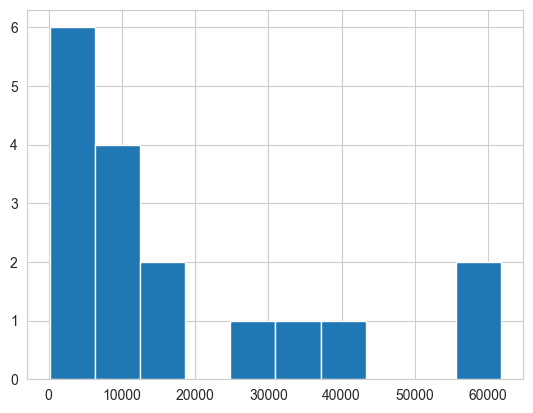

In [12]:
import matplotlib.pyplot as plt
plt.hist(grouped)

In [61]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)


df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)


df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)


frames = [df1, df2, df3]

result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [46]:
grouped.index
grouped.columns
ratio

{'SireLines': <bound method DataFrame.count of                          count
 SireLine                      
 DNA - Line 600           61752
 PIC - 800                57567
 Topigs Norsvin - Talent  37480
 Hypor - Custom Purple    32328
 Hypor - Magnus           29418
 Other                    15831
 Topigs Norsvin - Tempo   13413
 AGC - Meat Maker         10539
 PIC - 359                 9570
 Genesus - Duroc           8436
 Alphagene - Alpha Duroc   6369
 Hypor - Kanto             2919
 PIC - 390                 2295
 Hypor - Custom Orange     1605
 AGC - Feed Saver          1317
 PIC - 410                 1005
 PIC - 380                  180>}

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\msmetanin\AppData\Local\Temp\ipykernel_18244\490906852.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summ = all_gen_production.groupby(['SireLine', 'DamLine'])['AFPercentLean', 'AFFatDepth'].agg({'mean', 'count'})


(array([[23.,  7.,  4.,  2.,  2.,  0.,  1.,  1.,  0.,  1.],
        [41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [23.,  7.,  4.,  2.,  2.,  0.,  1.,  1.,  0.,  1.],
        [41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([1.44379310e+01, 2.91619414e+03, 5.81795034e+03, 8.71970655e+03,
        1.16214628e+04, 1.45232190e+04, 1.74249752e+04, 2.03267314e+04,
        2.32284876e+04, 2.61302438e+04, 2.90320000e+04]),
 <a list of 4 BarContainer objects>)

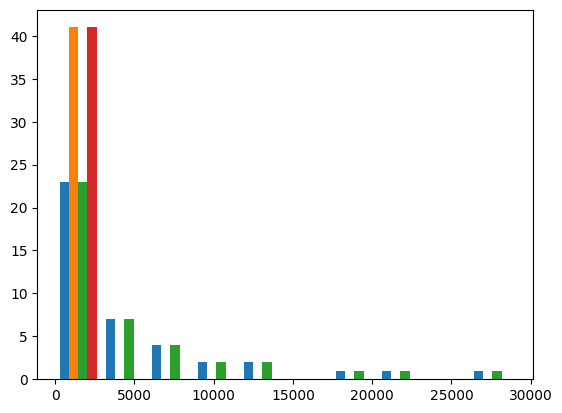

In [66]:
summ = all_gen_production.groupby(['SireLine', 'DamLine'])['AFPercentLean', 'AFFatDepth'].agg({'mean', 'count'})
plt.hist(summ)

C:\Users\msmetanin\AppData\Local\Temp\ipykernel_18244\953796215.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summ = all_gen_production.groupby(['SireLine', 'DamLine'])['AFPercentLean', 'AFFatDepth'].agg({'mean'})


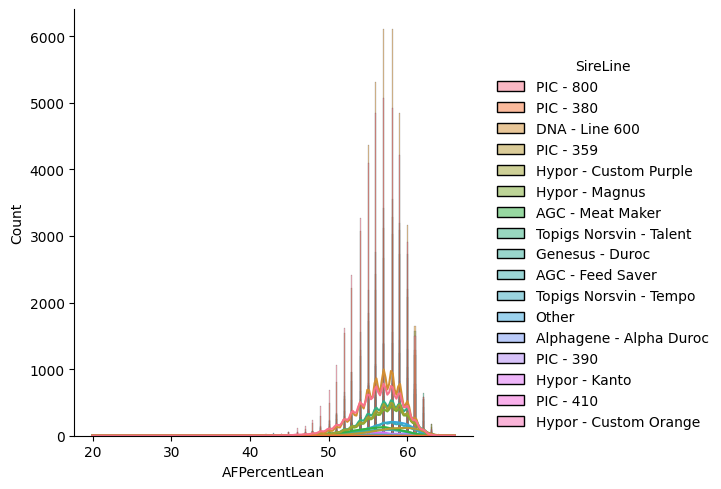

In [59]:
# all_gen_production['SireLine'].unique()
sns.displot(all_gen_production, x = 'AFPercentLean', kde = True, hue = 'SireLine')
plt.show()

In [21]:
query = '''SELECT *
            FROM ProductionByHour
            WHERE Createdatefloat = '20230508'
            '''

df_changes = pd.read_sql(query, cnxn, params = [])
df_changes

C:\Users\msmetanin\AppData\Local\Temp\ipykernel_15804\1472636457.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_changes = pd.read_sql(query, cnxn, params = [])


,ItemKey,QuantittyOfPieces,NetWeight,GrossWeight,CostCenterKey,QtyIU,QtyPU,CreateDateFloat,InventoryNLotKey,ProductionDateFloat,InventoryLotDateFloat,Hr,StationID


In [6]:
query = '''SELECT *
            FROM dbo.CutSheetSnapshot
            WHERE Date1 between ? and ?
            --and ItemNumber = 32609
            '''
df_cut = pd.read_sql(query, cnxn, params = ['20230419', '20230419'])
df_cut


C:\Users\msmetanin\AppData\Local\Temp\ipykernel_13700\2059677432.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cut = pd.read_sql(query, cnxn, params = ['20230419', '20230419'])


,ItemNumber,Date1,Day1,Day2,Day3,Adjustments,CMDC,Freezer,FreezerAdd,TotalWOInv,ToProduce,Conversion,NumofPieces,MeatItem,Primal
0,793.0,20230419.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0,6.0,205.0,1230.0,703.0,70.0
1,10003.0,20230419.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0,24.0,701.0,70.0
2,10005.0,20230419.0,0.0,66.0,0.0,-1.0,0.0,0.0,0.0,65.0,65.0,6.0,390.0,706.0,70.0
3,10007.0,20230419.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,22.0,22.0,6.0,132.0,703.0,70.0
4,10030.0,20230419.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,827.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,32024.0,20230419.0,5.0,0.0,0.0,6.0,0.0,0.0,0.0,11.0,11.0,135.0,1485.0,103.0,10.0
211,32034.0,20230419.0,16.0,0.0,0.0,31.0,0.0,0.0,0.0,47.0,47.0,135.0,6345.0,103.0,10.0
212,33627.0,20230419.0,8.0,3.0,0.0,-11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,10.0
213,37084.0,20230419.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,20.0,20.0,160.0,3200.0,149.0,10.0


In [28]:
df_cut.columns

Index(['ItemNumber', 'Date1', 'Day1', 'Day2', 'Day3', 'Adjustments', 'CMDC',
       'Freezer', 'FreezerAdd', 'TotalWOInv', 'ToProduce', 'Conversion',
       'NumofPieces', 'MeatItem', 'Primal'],
      dtype='object')

## Prior Cut Sheet From conapp02

In [7]:
server = 'cmpcsb01'
database = 'packagingplanner'
username = 'remotequery'
password = "excel"

cnxn = odbc.connect('DRIVER={SQL Server}; SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password, trusted_connection='no')
cursor = cnxn.cursor()
# print(cursor)

query = '''SELECT *

   FROM ProductoinRequirementsV2
   --ProductoinRequirementsV2
   WHERE productiondate between  ? and ?

    --GROUP BY MeatItem
    '''
df_cut = pd.read_sql(query, cnxn, params=[
    '20230425', '20230426'
]
                     )
df_cut




C:\Users\msmetanin\AppData\Local\Temp\ipykernel_25776\420950159.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cut = pd.read_sql(query, cnxn, params=[


,ExecutionDate,ProductionDate,Day1Date,Day2Date,ItemKey,ItemDesc,Item,CategoryKey,CategoryDesc,SubCategoryKey,...,ItemPieces,CutsheetItemID,ExpectedQty,ProductionQty,RemainingQty,Priority1Qty,Priority2Qty,Priority3Qty,Priority4Qty,TotalComments
0,2023-04-25 21:00:08.907,20230426,20230426,20230427,10001,Fresh Pork Loin Select,10001 - Fresh Pork Loin Select,20,LOINS,200,...,3,371445,57,0,57,0,0,3,54,0
1,2023-04-25 21:00:08.907,20230426,20230426,20230427,10005,Fresh Pork Shoulder Butt Select,10005 - Fresh Pork Shoulder Butt Select,40,SHOULDERS,440,...,6,371609,59,0,59,0,0,21,38,0
2,2023-04-25 21:00:08.907,20230426,20230426,20230427,10006,Fresh Pork Shoulder Butt Boneless,10006 - Fresh Pork Shoulder Butt Boneless,40,SHOULDERS,440,...,7,371610,23,0,23,0,0,15,8,0
3,2023-04-25 21:00:08.907,20230426,20230426,20230427,10007,Fresh Pork Shoulder Picnic,10007 - Fresh Pork Shoulder Picnic,40,SHOULDERS,460,...,6,371611,23,0,23,0,0,18,5,0
4,2023-04-25 21:00:08.907,20230426,20230426,20230427,10011,Fresh Pork Ham Boneless Defatted,10011 - Fresh Pork Ham Boneless Defatted,50,HAMS,550,...,3,371554,25,0,25,0,0,25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2023-04-25 21:00:08.907,20230426,20230426,20230427,36046,Fresh Pork Jowl Rind,36046 - Fresh Pork Jowl Rind,40,SHOULDERS,480,...,0,371678,2,0,2,0,0,2,0,0
359,2023-04-25 21:00:08.907,20230426,20230426,20230427,37036,Fresh Pork Ham Membrane Trim,37036 - Fresh Pork Ham Membrane Trim,50,HAMS,580,...,0,371603,2,0,2,2,0,0,0,0
360,2023-04-25 21:00:08.907,20230426,20230426,20230427,37046,Fresh Pork Heavy Butt Rind,37046 - Fresh Pork Heavy Butt Rind,40,SHOULDERS,480,...,0,371666,6,0,6,0,6,0,0,0
361,2023-04-25 21:00:08.907,20230426,20230426,20230427,38044,Fresh Pork Loin Boneless Main Muscle,38044 - Fresh Pork Loin Boneless Main Muscle,20,LOINS,200,...,187,371502,3,0,3,0,0,0,3,0


In [5]:
cursor.execute("SELECT table_name FROM information_schema.tables")
for table_name in cursor:
   print(table_name)

('ProductionSchedule1', )
('PackCapacityRequirements', )
('sysdiagrams', )
('ProductoinRequirementsV2', )
('vwPrepForCutInputPriorities', )
('vwCutSheetInputData', )
('vwPrepForCutSheetCompareVsPosition_CutSheet', )
('vwCutSheetCompareVsPosition_CutSheet', )
('PositionSheetPriorities', )
('vwCutSheetCompareVsPosition_Position', )
('vwPrepForCutSheetCompareVsPosition_Position', )
('Vi0044', )
('vi0044_00108_1', )
('ProductionRequirements', )
('sy8116_00102', )
('ItemList', )
('tblNewBudget2023', )
('Units', )
('vwItemsWithUnits', )
('ProductionDetails', )
('activity_sequence', )
('vwTotalPackagingLabelByProduct', )
('FinishedGoodToMeatItem', )
('vi0046_00105', )
('activity_capacity', )
('VWVI44', )
('sy856504', )
('sy856601', )
('vi7871_00001', )
('vi7876_00001', )
('vi7877_00001', )
('ProductionSchedule', )
('vi0044_00108', )
('vi0044_00108V1', )
('vi0044_00108_20220428', )
('vi0041_00107_20220428', )
('vi0044_00108_Archive', )
('vi0044_00108_Archive1', )
('vi0044_April25May3', )
('vi0

In [11]:

query = '''EXEC spCutSheetVSProductionSheetPriorities ?

    '''
df_cut_p = pd.read_sql(query, cnxn, params=[
    '20230426'#, '20230426'
]
                     )
df_cut_p



C:\Users\msmetanin\AppData\Local\Temp\ipykernel_25776\790060142.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cut_p = pd.read_sql(query, cnxn, params=[


,ProductionDate,Day1Date,Day2Date,ItemKey,CS_Priority,CS_Qty,PS_Priority,PS_Qty,PS_Version,CS_Exist,CS_Version,PS_Exist,PositionsExcelExecutionDate,PositionsExcelVersion
0,20230426,20230426,20230427,10001,P1,0.0,P1,0.0,210004,Y,210008,Y,2023-04-24 17:38:46.173,173846
1,20230426,20230426,20230427,10001,P2,0.0,P2,0.0,210004,Y,210008,Y,2023-04-24 17:38:46.173,173846
2,20230426,20230426,20230427,10001,P3,3.0,P3,3.0,210004,Y,210008,Y,2023-04-24 17:38:46.173,173846
3,20230426,20230426,20230427,10001,P4,54.0,P4,46.0,210004,Y,210008,Y,2023-04-24 17:38:46.173,173846
4,20230426,20230426,20230427,10003,None,NaN,P1,0.0,210004,N,None,Y,2023-04-24 17:52:37.937,175237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,20230426,20230426,20230427,38044,P4,3.0,P4,3.0,210004,Y,210008,Y,2023-04-24 17:38:46.203,173846
876,20230426,20230426,20230427,38084,P1,0.0,P1,0.0,210004,Y,210008,Y,2023-04-24 17:55:32.363,175532
877,20230426,20230426,20230427,38084,P2,0.0,P2,0.0,210004,Y,210008,Y,2023-04-24 17:55:32.363,175532
878,20230426,20230426,20230427,38084,P3,10.0,P3,10.0,210004,Y,210008,Y,2023-04-24 17:55:32.363,175532


## Packagig Data

In [9]:
query = '''Select
Itemkey,
Createdatefloat

from ProductionByHour
where createdatefloat = "20230505"
'''

df_production = pd.read_sql(query, cnxn)
df_production.head()

C:\Users\msmetanin\AppData\Local\Temp\ipykernel_15804\1930634910.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_production = pd.read_sql(query, cnxn)


DatabaseError: Execution failed on sql 'Select
Itemkey,
Createdatefloat

from ProductionByHour
where createdatefloat = "20230505"
': ('42S22', "[42S22] [Microsoft][ODBC SQL Server Driver][SQL Server]Invalid column name '20230505'. (207) (SQLExecDirectW)")